## INDIAN START UPS ECOSYSTEM ANALYSIS IN 2018-2021

## 1. BUSINESS UNDERSTANDING

Our Team, Santa Fe is trying to venture into the Indian Startup Ecosystem.  With numerous of successful enterprises earning the coveted "unicorn" label, India has become a favored investment destination. Our team will make an effort to respond by analyzing the data from 2018-2021 in order to focus our search for the best course of action for investment as a young organization.

## 2. DATA COLLECTION AND DATA PREPARATION
   ## 2.1 DATA COLLECTION

Provided with 4 datasets - the first 2 are to be imported from LP1 database, one exits in onedrive and the other is found in Github Repository.

In [2]:
# DATA IMPORTS IN THE LP1 DATABASE
# 1. Install pyodbc and python-dotenv
%pip install pyodbc  
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Import all the necessary packages

import pyodbc                    #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as ticker

# Set the display format for floats
pd.options.display.float_format = '{:.2f}'.format

warnings.filterwarnings('ignore')

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [6]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP1_startup_funding2020"
data20 = pd.read_sql(query, connection)
data20.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.00,None,None
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.00,Pre-seed,None
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.00,None,None
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.00,None,None


In [7]:
data20.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [8]:
# Importing the Table 2.
query = "Select * from dbo.LP1_startup_funding2021"
data21 = pd.read_sql(query, connection)
data21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [9]:
data21.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [10]:
# Second Data from one Drive
data19 = pd.read_csv('startup_funding2019.csv')

data19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [11]:
data19.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [12]:
# 3rd Data Set from git hub respository
data18 = pd.read_csv('startup_funding2018.csv')

data18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [13]:
data18.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

## HYPOTHESIS FORMULATION


Null Hypotheis - The tech sector doesnt have highest Sucess rate of being funded.

Alternative Hypothesis - The tech Sector has highest success rate of being funded  and investors should venture in the Tech Industry in Indian.


QUESTIONS

 The following questions were asked to assist in the data analysis process:

1. Which company has the highest funding?
2. Which sector has the highest funding?
3. Who are the top 5 investors sectors that recieved the most funding?
4. What is total amount of funding received in each year?
5. The top funded sector in the years 2018, 2019, 2020 and 2021.
6. Which is location recieved most funding?
7. At what stage do start up recieve most funding?

   ## 2.2 DATA CLEANING

### 2.2.1. Cleaning the 2018 dataset

In [14]:
# Cleaning the 2019 dataset
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


### I. Dropping the columns not needed for analysis

In [15]:
# Dropping the 'About' columns since it is not present in the other datasets
data18 = data18.drop('About Company', axis=1)
data18.head()

,Company Name,Industry,Round/Series,Amount,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India"


### II. Check for duplicates in the dataset


In [16]:
# Check for duplicates
duplicates = data18.duplicated(keep=False)

# Returns the total number of duplicates
duplicates_count = duplicates.value_counts()
duplicates_count


False    524
True       2
dtype: int64

In [17]:
# Identifying the duplicate rows
duplicates = data18[data18.duplicated(keep=False)]
duplicates

,Company Name,Industry,Round/Series,Amount,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"


##### We can see there is only one duplicated row, let's drop the row

In [18]:
# Dropping one of the duplicated row
data18.drop_duplicates(keep='first', inplace=True)


In [19]:
# Confirm if the duplicate rows have been dropped
duplicates = data18[data18.duplicated(keep=False)]
duplicates

,Company Name,Industry,Round/Series,Amount,Location


### III. Check for missing values

In [20]:
missing_values_data18 = data18.isnull().sum()
missing_values_data18

Company Name    0
Industry        0
Round/Series    0
Amount          0
Location        0
dtype: int64

#### We can see that there are no missing values. But missing values can be represented using '-', let's check 

In [21]:
# Replacing '-' with NaN
data18.replace("—", np.nan, inplace=True)

# Check for missing values
missing_values_data18 = data18.isnull().sum()
missing_values_data18

Company Name      0
Industry         30
Round/Series      0
Amount          148
Location          0
dtype: int64

#### Now we can see that we have a lot of missing values. Let's try dealing with the missing values

In [22]:
# Cleaning the 'Industry' column by replacing the missing values with 'Unknown'
data18['Industry'] = data18['Industry'].fillna('Unknown')
data18.head(10)

,Company Name,Industry,Round/Series,Amount,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India"
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India"
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India"
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India"
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India"
9,Microchip Payments,Mobile Payments,Seed,NaN,"Bangalore, Karnataka, India"


In [23]:
# Cleaning the Location column by splitting at the commas
data18['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [24]:
# Cleaning the Location Industry by splitting at the commas
data18[["City", "State", "Country"]]= data18['Location'].str.split(',', expand=True)
data18

,Company Name,Industry,Round/Series,Amount,Location,City,State,Country
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Gurgaon,Haryana,India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",Noida,Uttar Pradesh,India
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,"Haryana, Haryana, India",Haryana,Haryana,India
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Mumbai,Maharashtra,India


In [25]:
# Replace '$' currency symbol and commas with empty string
data18['Amount'] = data18['Amount'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Cleaning the 'Amount' column by converting Indian Rupees to USD
data18.loc[data18['Amount'].astype(str).str.contains('₹'), 'Amount'] = data18.loc[data18['Amount'].astype(str).str.contains('₹'),'Amount'].apply(lambda x: float(x.replace('₹', ''))*0.012)

# Converting the 'Amount' column to numeric datatype, replacing any non-numeric values with NaN
data18['Amount'] = pd.to_numeric(data18['Amount'], errors='coerce')

# Rename column "Amount" to "Amount($)"
data18.rename(columns={'Amount':'Amount($)'}, inplace=True)

# Convert Amount($) column from object to float datatype
data18['Amount($)'] = data18['Amount($)'].astype(float)

data18

,Company Name,Industry,Round/Series,Amount($),Location,City,State,Country
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.00,"Gurgaon, Haryana, India",Gurgaon,Haryana,India
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",Noida,Uttar Pradesh,India
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,"Haryana, Haryana, India",Haryana,Haryana,India
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
524,Droni Tech,Information Technology,Seed,420000.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India


In [26]:
# Replace NaN values in 'Amount($)' column with median
# Calculate the median of 'Amount($)' column
mean_amount = data18['Amount($)'].mean()

# Replacing NaN with the mean
data18['Amount($)'].fillna(value=mean_amount, inplace=True)

data18

,Company Name,Industry,Round/Series,Amount($),Location,City,State,Country
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.00,"Gurgaon, Haryana, India",Gurgaon,Haryana,India
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",Noida,Uttar Pradesh,India
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,17030531.59,"Hyderabad, Andhra Pradesh, India",Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
522,Happyeasygo Group,"Tourism, Travel",Series A,17030531.59,"Haryana, Haryana, India",Haryana,Haryana,India
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
524,Droni Tech,Information Technology,Seed,420000.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India


In [27]:
# Creating a year column and filling with 2018
data18.insert(0,'Year', 2018)
data18.head()

,Year,Company Name,Industry,Round/Series,Amount($),Location,City,State,Country
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.00,"Gurgaon, Haryana, India",Gurgaon,Haryana,India
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",Noida,Uttar Pradesh,India
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,17030531.59,"Hyderabad, Andhra Pradesh, India",Hyderabad,Andhra Pradesh,India


In [28]:
# Cleaning the Location column by splitting at the commas
data18[["City", "State", "Country"]]= data18['Location'].str.split(',', expand=True)
data18

,Year,Company Name,Industry,Round/Series,Amount($),Location,City,State,Country
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.00,"Gurgaon, Haryana, India",Gurgaon,Haryana,India
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",Noida,Uttar Pradesh,India
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,17030531.59,"Hyderabad, Andhra Pradesh, India",Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...,...
521,2018,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,"Bangalore, Karnataka, India",Bangalore,Karnataka,India
522,2018,Happyeasygo Group,"Tourism, Travel",Series A,17030531.59,"Haryana, Haryana, India",Haryana,Haryana,India
523,2018,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
524,2018,Droni Tech,Information Technology,Seed,420000.00,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India


In [29]:
# Dropping the Country and Location column as it is not needed for the analysis
columns_to_drop = ['Country','Location','State']
data18.drop(columns_to_drop, axis=1, inplace=True)
data18.head()

,Year,Company Name,Industry,Round/Series,Amount($),City
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.00,Mumbai
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.00,Gurgaon
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,17030531.59,Hyderabad


In [30]:
# Check for missing values
data18.isna().sum()

Year            0
Company Name    0
Industry        0
Round/Series    0
Amount($)       0
City            0
dtype: int64

In [31]:
# Check the data types
data18.dtypes

Year              int64
Company Name     object
Industry         object
Round/Series     object
Amount($)       float64
City             object
dtype: object

In [32]:
#Inspecting the City and State columns
data18['City'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [33]:
# Replacing Bengaluru and Bangalore City with Bangalore
data18['City'] = data18['City'].str.replace('Bangalore','Bengaluru', case=False)
data18['City'] = data18['City'].str.replace('Bangalore City','Bengaluru', case=False) 
data18['City'].unique()

array(['Bengaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Bengaluru City', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow'], dtype=object)

In [34]:
#Renaming the City column to Headquarter and company name to company/Brand, same as round/series to stage
data18.rename(columns={'City':'HeadQuarter'}, inplace=True)
data18.rename(columns={'Company Name':'Company/Brand'}, inplace=True)
data18.rename(columns={'Round/Series':'Stage'}, inplace=True)
data18.rename(columns={'Industry':'Sector'}, inplace=True)

In [35]:
data18

,Year,Company/Brand,Sector,Stage,Amount($),HeadQuarter
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bengaluru
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.00,Mumbai
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.00,Gurgaon
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,17030531.59,Hyderabad
...,...,...,...,...,...,...
521,2018,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,Bengaluru
522,2018,Happyeasygo Group,"Tourism, Travel",Series A,17030531.59,Haryana
523,2018,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,Mumbai
524,2018,Droni Tech,Information Technology,Seed,420000.00,Mumbai


In [36]:
#Inspecting the Stage Column
data18['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [37]:
#Replace the 
data18['Stage'] = data18['Stage'].str.replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593','Unavailable', case=False) 
data18['Stage'] = data18['Stage'].str.replace('Undisclosed','Unknown', case =False)

In [38]:
data18['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Unknown', 'Unavailable',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [39]:
data18['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

The final 2018 Cleaned Data Set

In [40]:
data18.head()

,Year,Company/Brand,Sector,Stage,Amount($),HeadQuarter
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bengaluru
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.00,Mumbai
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.00,Gurgaon
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,17030531.59,Hyderabad


  ### 2.2.2 Cleaning the 2019 dataset

In [41]:
data19.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.00,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
9,Lenskart,2010.00,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G


In [42]:
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


#### I. Dropping columns not needed for analysis

In [43]:
# Dropping the columns not needed for analysis
columns_to_drop = ['What it does', 'Founded', 'Founders', 'Investor']  #Founded?
data19.drop(columns_to_drop, axis = 1, inplace=True)
data19


,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,NaN,Ecommerce,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"$6,000,000",NaN
...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,"$20,000,000",Series A
85,Oyo,Gurugram,Hospitality,"$693,000,000",NaN
86,GoMechanic,Delhi,Automobile & Technology,"$5,000,000",Series B
87,Spinny,Delhi,Automobile,"$50,000,000",NaN


#### II. Checking for duplicates

In [44]:
# Check for duplicates
duplicates = data19.duplicated(keep=False)

# Returns the total number of duplicates
duplicates_count = duplicates.value_counts()
duplicates_count

False    89
dtype: int64

#### III. Checking for missing values

In [45]:
# Check for the missing
data19.isnull().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
Amount($)         0
Stage            46
dtype: int64

##### The aren't many missing values so let's try inspecting them

In [46]:
# Cleaning the Headquater column
data19['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [47]:
# Replacing the 'nan' with 'Unknown'
data19['HeadQuarter'] = data19['HeadQuarter'].fillna('Unknown')
data19['HeadQuarter'].unique()

array(['Unknown', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [48]:
# Cleaning the Sector column
data19['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [49]:
# Replacing nan in Sector column with Unknown
data19['Sector'] = data19['Sector'].fillna('Unknown')
data19

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unknown,Ecommerce,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"$6,000,000",NaN
...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,"$20,000,000",Series A
85,Oyo,Gurugram,Hospitality,"$693,000,000",NaN
86,GoMechanic,Delhi,Automobile & Technology,"$5,000,000",Series B
87,Spinny,Delhi,Automobile,"$50,000,000",NaN


In [50]:
# Cleaning the Stage column 
data19['Stage'] = data19['Stage'].fillna('Unknown')
data19 

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unknown,Ecommerce,"$6,300,000",Unknown
1,Ruangguru,Mumbai,Edtech,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"$6,000,000",Unknown
...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,"$20,000,000",Series A
85,Oyo,Gurugram,Hospitality,"$693,000,000",Unknown
86,GoMechanic,Delhi,Automobile & Technology,"$5,000,000",Series B
87,Spinny,Delhi,Automobile,"$50,000,000",Unknown


Inspecting Amount Column

In [51]:
data19['Amount($)'].value_counts()

Undisclosed     12
$5,000,000       6
$1,500,000       4
$6,000,000       4
$1,000,000       4
$30,000,000      3
$20,000,000      3
$50,000,000      3
$4,000,000       3
$5,500,000       3
$26,000,000      2
$2,000,000       2
$12,000,000      2
$100,000         2
$5,700,000       1
$693,000,000     1
$4,800,000       1
$120,000,000     1
$311,000,000     1
$6,800,000       1
$36,000,000      1
$2,800,000       1
$220,000         1
$600,000         1
$7,000,000       1
$2,100,000       1
$70,000,000      1
$60,000,000      1
$8,000,000       1
$25,000,000      1
$6,300,000       1
$100,000,000     1
$11,000,000      1
$28,000,000      1
$275,000,000     1
$22,000,000      1
$140,500         1
$540,000,000     1
$15,000,000      1
$182,700         1
$15,500,000      1
$400,000         1
$2,500,000       1
$140,000         1
$230,000,000     1
$49,400,000      1
$32,000,000      1
$150,000,000     1
$150,000         1
$33,000,000      1
Name: Amount($), dtype: int64

In [52]:
# Cleaning the amount column
# Replace currency symbol and commas with empty string
data19['Amount($)'] = data19['Amount($)'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Convert 'Amount' column to numeric datatype, replacing any non-numeric values.
data19['Amount($)'] = pd.to_numeric(data19['Amount($)'], errors='coerce')

# Convert Amount($) column from object to float datatype
data19['Amount($)'] = data19['Amount($)'].astype(float)

# The updated dataframe
data19.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unknown,Ecommerce,6300000.00,Unknown
1,Ruangguru,Mumbai,Edtech,150000000.00,Series C
2,Eduisfun,Mumbai,Edtech,28000000.00,Fresh funding
3,HomeLane,Chennai,Interior design,30000000.00,Series D
4,Nu Genes,Telangana,AgriTech,6000000.00,Unknown
5,FlytBase,Pune,Technology,NaN,Unknown
6,Finly,Bangalore,SaaS,NaN,Unknown
7,Kratikal,Noida,Technology,1000000.00,Pre series A
8,Quantiphi,Unknown,AI & Tech,20000000.00,Series A
9,Lenskart,Delhi,E-commerce,275000000.00,Series G


In [53]:
# Replace NaN values in 'Amount($)' column with the mean
# Calculate the mean of Amount
median_amount = data19['Amount($)'].median()

# Replace NaN values with mean
data19['Amount($)'].fillna(median_amount, inplace=True)
data19.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Bombay Shaving,Unknown,Ecommerce,6300000.00,Unknown
1,Ruangguru,Mumbai,Edtech,150000000.00,Series C
2,Eduisfun,Mumbai,Edtech,28000000.00,Fresh funding
3,HomeLane,Chennai,Interior design,30000000.00,Series D
4,Nu Genes,Telangana,AgriTech,6000000.00,Unknown
5,FlytBase,Pune,Technology,6000000.00,Unknown
6,Finly,Bangalore,SaaS,6000000.00,Unknown
7,Kratikal,Noida,Technology,1000000.00,Pre series A
8,Quantiphi,Unknown,AI & Tech,20000000.00,Series A
9,Lenskart,Delhi,E-commerce,275000000.00,Series G


In [54]:
# Check for missing values 
data19.isna().sum()

Company/Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
Stage            0
dtype: int64

In [55]:
#Inspecting stage column
data19['Stage'].unique()

array(['Unknown', 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [56]:
# Creating a year column and filling with 2019
data19.insert(0,'Year', 2019)
data19.head()

,Year,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,2019,Bombay Shaving,Unknown,Ecommerce,6300000.00,Unknown
1,2019,Ruangguru,Mumbai,Edtech,150000000.00,Series C
2,2019,Eduisfun,Mumbai,Edtech,28000000.00,Fresh funding
3,2019,HomeLane,Chennai,Interior design,30000000.00,Series D
4,2019,Nu Genes,Telangana,AgriTech,6000000.00,Unknown


In [57]:
#rearrange columns to conform with other datasets
# Create a list of column names in the desired order
desired_columns = ['Year', 'Company/Brand', 'Sector', 'Amount($)', 'Stage', 'HeadQuarter']

# Reindex the DataFrame with the desired column order
data19 = data19.reindex(columns=desired_columns)

The final Cleaned 2019 DATA SET

In [58]:
data19.head(10)

,Year,Company/Brand,Sector,Amount($),Stage,HeadQuarter
0,2019,Bombay Shaving,Ecommerce,6300000.00,Unknown,Unknown
1,2019,Ruangguru,Edtech,150000000.00,Series C,Mumbai
2,2019,Eduisfun,Edtech,28000000.00,Fresh funding,Mumbai
3,2019,HomeLane,Interior design,30000000.00,Series D,Chennai
4,2019,Nu Genes,AgriTech,6000000.00,Unknown,Telangana
5,2019,FlytBase,Technology,6000000.00,Unknown,Pune
6,2019,Finly,SaaS,6000000.00,Unknown,Bangalore
7,2019,Kratikal,Technology,1000000.00,Pre series A,Noida
8,2019,Quantiphi,AI & Tech,20000000.00,Series A,Unknown
9,2019,Lenskart,E-commerce,275000000.00,Series G,Delhi


  #### 2.2.3. Cleaning 2020 Dataset

In [59]:
#cleaning the 2020 data
data20.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.00,None,None
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.00,Pre-seed,None
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.00,None,None
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.00,None,None
5,qZense,2019.00,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.00,Seed,None
6,MyClassboard,2008.00,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.00,Pre-series A,None
7,Metvy,2018.00,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,NaN,Pre-series,None
8,Rupeek,2015.00,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.00,Series C,None
9,Gig India,2017.00,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.00,Pre-series A,None


In [60]:
## check for Data Types
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [61]:
# Check for shape of the data
data20.shape

(1055, 10)

The data 2020 has 10 columns, where by two of the columns contains float entries and 8 others contains object entries

 I. Drop columns not needed for analysis

In [62]:
#drop column 10,founders,investor,what it does,Founded, since it is needed for analysis
data20 = data20.drop('column10', axis=1)
data20 = data20.drop('Founders', axis=1)
data20 = data20.drop('Investor', axis = 1)
data20 = data20.drop('What_it_does', axis = 1)
data20 = data20.drop('Founded',axis = 1)

In [63]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   HeadQuarter    961 non-null    object 
 2   Sector         1042 non-null   object 
 3   Amount         801 non-null    float64
 4   Stage          591 non-null    object 
dtypes: float64(1), object(4)
memory usage: 41.3+ KB


The unnecessary columns have been dropped and now we have 5 columns left. Lets rename the columns to match with 2018 and 2019 data

In [64]:
#rename column names to make it consistent with the other data set
data20.rename(columns={'Company_Brand' : 'Company/Brand'}, inplace = True)

In [65]:
#The updated Dataframe for 2020
data20.head(10)

,Company/Brand,HeadQuarter,Sector,Amount,Stage
0,Aqgromalin,Chennai,AgriTech,200000.00,None
1,Krayonnz,Bangalore,EdTech,100000.00,Pre-seed
2,PadCare Labs,Pune,Hygiene management,NaN,Pre-seed
3,NCOME,New Delhi,Escrow,400000.00,None
4,Gramophone,Indore,AgriTech,340000.00,None
5,qZense,Bangalore,AgriTech,600000.00,Seed
6,MyClassboard,Hyderabad,EdTech,600000.00,Pre-series A
7,Metvy,Gurgaon,Networking platform,NaN,Pre-series
8,Rupeek,Bangalore,FinTech,45000000.00,Series C
9,Gig India,Pune,Crowdsourcing,1000000.00,Pre-series A


 II. Check for duplicates in the data set

In [66]:
#check for duplicates in the data20
duplicates = data20.duplicated(keep=False)

#returns the total number of duplicates
duplicates_count = duplicates.value_counts()
duplicates_count

False    1043
True       12
dtype: int64

In [67]:
#identify docuplicated rows
duplicates = data20[data20.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount,Stage
120,Nykaa,Mumbai,Cosmetics,NaN,None
129,Krimanshi,Jodhpur,Biotechnology company,600000.00,Seed
145,Krimanshi,Jodhpur,Biotechnology company,600000.00,Seed
205,Nykaa,Mumbai,Cosmetics,NaN,None
215,Genius Teacher,Mumbai,Edtech,2000000.00,None
233,Genius Teacher,Mumbai,Edtech,2000000.00,None
326,Byju’s,Bangalore,EdTech,500000000.00,None
362,Byju’s,Bangalore,EdTech,500000000.00,None
771,Capital Float,Bangalore,Fintech,15000000.00,None
935,Byju,None,Edtech,200000000.00,None


In [68]:
#There are 12 duplicated rows
#drop duplicated rows
data20.drop_duplicates(keep='first', inplace= True)

In [69]:
#check if duplicates have been dropped
duplicates = data20[data20.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount,Stage


III. Check for missing values

In [70]:
#checking for missing values in Data20
missing_values_data20 = data20.isnull().sum()
missing_values_data20

Company/Brand      0
HeadQuarter       93
Sector            13
Amount           253
Stage            459
dtype: int64

Handling Missing values columnwise- inspecting sector column


In [71]:
## Inspect the company column,
data20['Sector'].value_counts()

Fintech                  79
Edtech                   65
FinTech                  51
EdTech                   39
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: Sector, Length: 302, dtype: int64

In [72]:
#replace missing values in 'Sector' column with 'Unknown'
data20['Sector'] = data20['Sector'].fillna('Unknown')
data20.head(10)

,Company/Brand,HeadQuarter,Sector,Amount,Stage
0,Aqgromalin,Chennai,AgriTech,200000.00,None
1,Krayonnz,Bangalore,EdTech,100000.00,Pre-seed
2,PadCare Labs,Pune,Hygiene management,NaN,Pre-seed
3,NCOME,New Delhi,Escrow,400000.00,None
4,Gramophone,Indore,AgriTech,340000.00,None
5,qZense,Bangalore,AgriTech,600000.00,Seed
6,MyClassboard,Hyderabad,EdTech,600000.00,Pre-series A
7,Metvy,Gurgaon,Networking platform,NaN,Pre-series
8,Rupeek,Bangalore,FinTech,45000000.00,Series C
9,Gig India,Pune,Crowdsourcing,1000000.00,Pre-series A


Inspecting the Amount column

In [73]:
## Inspect the company column,
data20['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [74]:
#It is assumed that the amounts are already in dollars.
#Rename 'Amount' column to 'Amount($)'
data20.rename(columns={'Amount' : 'Amount($)'}, inplace= True)
data20

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,200000.00,None
1,Krayonnz,Bangalore,EdTech,100000.00,Pre-seed
2,PadCare Labs,Pune,Hygiene management,NaN,Pre-seed
3,NCOME,New Delhi,Escrow,400000.00,None
4,Gramophone,Indore,AgriTech,340000.00,None
...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,1500000.00,None
1051,EpiFi,None,Fintech,13200000.00,Seed Round
1052,Purplle,Mumbai,Cosmetics,8000000.00,None
1053,Shuttl,Delhi,Transport,8043000.00,Series C


In [75]:
#calculate mean of the 'Amount($)' column 
#Replace missing values in 'Amount($)' column with the median
median_value = data20['Amount($)'].median()

data20['Amount($)'].fillna(value = median_value,  inplace=True)

data20

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,200000.00,None
1,Krayonnz,Bangalore,EdTech,100000.00,Pre-seed
2,PadCare Labs,Pune,Hygiene management,3000000.00,Pre-seed
3,NCOME,New Delhi,Escrow,400000.00,None
4,Gramophone,Indore,AgriTech,340000.00,None
...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,1500000.00,None
1051,EpiFi,None,Fintech,13200000.00,Seed Round
1052,Purplle,Mumbai,Cosmetics,8000000.00,None
1053,Shuttl,Delhi,Transport,8043000.00,Series C


Inspecting Stage column to check abnormly

In [76]:
## Inspect the company column,
data20['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [77]:
#fill in the missing values in the 'Stage' column with 'unknown'
data20['Stage'] = data20['Stage'].fillna('Unknown')
data20.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,200000.00,Unknown
1,Krayonnz,Bangalore,EdTech,100000.00,Pre-seed
2,PadCare Labs,Pune,Hygiene management,3000000.00,Pre-seed
3,NCOME,New Delhi,Escrow,400000.00,Unknown
4,Gramophone,Indore,AgriTech,340000.00,Unknown
5,qZense,Bangalore,AgriTech,600000.00,Seed
6,MyClassboard,Hyderabad,EdTech,600000.00,Pre-series A
7,Metvy,Gurgaon,Networking platform,3000000.00,Pre-series
8,Rupeek,Bangalore,FinTech,45000000.00,Series C
9,Gig India,Pune,Crowdsourcing,1000000.00,Pre-series A


IV. Inspecting  columns for anomaly

In [78]:
#Inspect the HeadQuarter column,
data20['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [79]:
data20[["City", "State", "Country"]]= data20['HeadQuarter'].str.split(',', expand=True)
data20.tail(30)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage,City,State,Country
1024,Harappa Education,New Delhi,Edtech,3000000.00,Unknown,New Delhi,None,None
1025,Rheo,None,Entertainment,2000000.00,Unknown,None,None,None
1026,Axio Biosolutions,Bangalore,Medtech,5200000.00,Series B,Bangalore,None,None
1027,Techbooze,None,Consultancy,15000000.00,Series A,None,None,None
1028,PayMart,Chandigarh,Fintech,3000000.00,Unknown,Chandigarh,None,None
1029,Testbook,None,Edtech,8400000.00,Series B,None,None,None
1030,FabAlley,Noida,Ecommerce,1100000.00,Unknown,Noida,None,None
1031,HaikuJAM,None,Unknown,3400000.00,Unknown,None,None,None
1032,Mamaearth,None,Ecommerce,18300000.00,Series A,None,None,None
1033,Rentomojo,None,Rental,2000000.00,Unknown,None,None,None


In [80]:
data20['State'].unique()

array([None, ' Tamilnadu', ' Rajastan', ' Texas', ' Haryana',
       ' United States', ' California', ' Ile-de-France',
       ' Silicon Valley', ' England', ' New South Wales', ' Lombardia',
       ' Queensland', ' West Coast', ' Kerala', ' Bihar', ' Karnataka',
       ' Newcastle upon Tyne', ' China', ' Zhejiang', ' Jawa Barat'],
      dtype=object)

In [81]:
# Drop Columns named - State Country and Hedquater then name city headquater

data20.drop('Country',axis = 1,inplace = True)
data20.drop('State',axis = 1,inplace = True)
data20.drop('HeadQuarter',axis = 1,inplace = True)
data20.head()

,Company/Brand,Sector,Amount($),Stage,City
0,Aqgromalin,AgriTech,200000.00,Unknown,Chennai
1,Krayonnz,EdTech,100000.00,Pre-seed,Bangalore
2,PadCare Labs,Hygiene management,3000000.00,Pre-seed,Pune
3,NCOME,Escrow,400000.00,Unknown,New Delhi
4,Gramophone,AgriTech,340000.00,Unknown,Indore


In [82]:
#replace missing values in 'Location' column with 'Unknown'
data20['City'] = data20['City'].fillna('Unknown')
data20.tail(20)

,Company/Brand,Sector,Amount($),Stage,City
1034,Zomato,Foodtech,150000000.00,Unknown,Unknown
1036,Generico,Pharmacy,1400000.00,Unknown,Mumbai
1037,HighRadius,SaaS,125000000.00,Series B,Hyderabad
1038,Chai Kings,Beverage,1000000.00,Unknown,Chennai
1039,Rivigo,Logistics,3400000.00,Series F,Gurugram
1040,BuildPan,SaaS,3000000.00,Seed Round,Indore
1041,Shiksha,Edtech,181000.00,Unknown,Unknown
1042,Super Surfaces,Deisgning,500000.00,Series A,Hyderabad
1043,Quicko,Taxation,280000.00,Unknown,Ahmedabad
1044,Satin Creditcare,Fintech,15000000.00,Unknown,Gurgaon


In [83]:
# Rename City column to Headquarter
data20.rename(columns={'City':'HeadQuarter'}, inplace=True)

Confirm if missing values have been resolved

In [84]:
#check for missing values
data20.isna().sum()

Company/Brand    0
Sector           0
Amount($)        0
Stage            0
HeadQuarter      0
dtype: int64

In [85]:
## Inspect the company column,
data20['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'Unknown',
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Delhi', 'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'Bangaldesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Trivandrum', 'Cochin', 'Samastipur',
       'Irvine', 'Tumkur', 'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing',
       'Rajastan', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Tangerang', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore',
       'Coimbatore', 'Bengaluru'], dtype=object)

In [86]:
#Renaming Some od Headquarter Entries
data20['HeadQuarter'] = data20['HeadQuarter'].str.replace('Banglore','Bengaluru', case=False)

In [87]:
data20['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'Unknown',
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Delhi', 'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'Bangaldesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Trivandrum', 'Cochin', 'Samastipur',
       'Irvine', 'Tumkur', 'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing',
       'Rajastan', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Tangerang', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Bengaluru',
       'Coimbatore'], dtype=object)

In [88]:
data20.head()

,Company/Brand,Sector,Amount($),Stage,HeadQuarter
0,Aqgromalin,AgriTech,200000.00,Unknown,Chennai
1,Krayonnz,EdTech,100000.00,Pre-seed,Bangalore
2,PadCare Labs,Hygiene management,3000000.00,Pre-seed,Pune
3,NCOME,Escrow,400000.00,Unknown,New Delhi
4,Gramophone,AgriTech,340000.00,Unknown,Indore


In [89]:
# Creating a year column and filling with 2018
data20.insert(0,'Year', 2020)
data20.head()

,Year,Company/Brand,Sector,Amount($),Stage,HeadQuarter
0,2020,Aqgromalin,AgriTech,200000.00,Unknown,Chennai
1,2020,Krayonnz,EdTech,100000.00,Pre-seed,Bangalore
2,2020,PadCare Labs,Hygiene management,3000000.00,Pre-seed,Pune
3,2020,NCOME,Escrow,400000.00,Unknown,New Delhi
4,2020,Gramophone,AgriTech,340000.00,Unknown,Indore


The Final Cleaned 2020 DataSet

In [90]:
data20.head()

,Year,Company/Brand,Sector,Amount($),Stage,HeadQuarter
0,2020,Aqgromalin,AgriTech,200000.00,Unknown,Chennai
1,2020,Krayonnz,EdTech,100000.00,Pre-seed,Bangalore
2,2020,PadCare Labs,Hygiene management,3000000.00,Pre-seed,Pune
3,2020,NCOME,Escrow,400000.00,Unknown,New Delhi
4,2020,Gramophone,AgriTech,340000.00,Unknown,Indore


## 2.2.4. Cleaning 2021 Dataset

In [91]:
data21.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.00,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.00,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
7,Qube Health,2016.00,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.00,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.00,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None


Cleaning data Column Wise

In [92]:
# Checking for data types
data21.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

one column is float, we need to convert amount column to float

I. DROP COLUMNS NOT NEEDED FOR ANALYSIS, TO MATCH ALL THE DATASETS
i.e Founder, Founded, What it does and Investor

In [93]:
data21.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [94]:
columndrop = ['Founded', 'Founders', 'What_it_does', 'Investor']
data21.drop(columndrop, axis=1, inplace=True)


In [95]:
data21.head()

,Company_Brand,HeadQuarter,Sector,Amount,Stage
0,Unbox Robotics,Bangalore,AI startup,"$1,200,000",Pre-series A
1,upGrad,Mumbai,EdTech,"$120,000,000",None
2,Lead School,Mumbai,EdTech,"$30,000,000",Series D
3,Bizongo,Mumbai,B2B E-commerce,"$51,000,000",Series C
4,FypMoney,Gurugram,FinTech,"$2,000,000",Seed


In [96]:
#rename column names to make it consistent with the other data set
data21.rename(columns={'Company_Brand' : 'Company/Brand'}, inplace = True)
data21.rename(columns= {'Amount': 'Amount($)'}, inplace = True)

II. Check for duplicates

In [97]:
#check for duplicates in the data20
duplicates = data21.duplicated(keep=False)

#returns the total number of duplicates
duplicates_count = duplicates.value_counts()
duplicates_count

False    1165
True       44
dtype: int64

We have 44 duplicates in the data 2021

In [98]:
#identify docuplicated rows
duplicates = data21[data21.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
94,Curefoods,Bangalore,Food & Beverages,$13000000,None
96,Bewakoof,Mumbai,Apparel & Fashion,$8000000,None
98,FanPlay,Computer Games,Computer Games,Upsparks,$1200000
104,Advantage Club,Mumbai,HRTech,$1700000,None
106,Ruptok,New Delhi,FinTech,$1000000,None
107,Curefoods,Bangalore,Food & Beverages,$13000000,None
109,Bewakoof,Mumbai,Apparel & Fashion,$8000000,None
111,FanPlay,Computer Games,Computer Games,Upsparks,$1200000
117,Advantage Club,Mumbai,HRTech,$1700000,None
119,Ruptok,New Delhi,FinTech,$1000000,None


In [99]:
#There are 44 duplicated rows
#drop duplicated rows
data21.drop_duplicates(keep='first', inplace= True)

In [100]:
#check if duplicates have been dropped
duplicates = data21[data21.duplicated(keep=False)]
duplicates

,Company/Brand,HeadQuarter,Sector,Amount($),Stage


All the dupicated rows have been dropped.

III. Check missing values

In [101]:
data21.isnull().sum()

Company/Brand      0
HeadQuarter        1
Sector             0
Amount($)          3
Stage            420
dtype: int64

We have one missing value in Headquarter, Amounts - 3 and Stage column have 420. We have to fill the missing values in the each column seperately.

#### We can see that there are few missing values. But missing values can be represented using '-', let's check 

In [102]:
# Replacing '-' with NaN
data21.replace("—", np.nan, inplace=True)

# Check for missing values
missing_values_data21 = data21.isnull().sum()
missing_values_data21

Company/Brand      0
HeadQuarter        1
Sector             0
Amount($)          3
Stage            420
dtype: int64

Its justified that this are the only missing values

In [103]:
# Dealing with Missing Values in Headquarter column fill in with unknown
data21['HeadQuarter'] = data20['HeadQuarter'].fillna('Unknown')
data21.head(10)

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Unbox Robotics,Chennai,AI startup,"$1,200,000",Pre-series A
1,upGrad,Bangalore,EdTech,"$120,000,000",None
2,Lead School,Pune,EdTech,"$30,000,000",Series D
3,Bizongo,New Delhi,B2B E-commerce,"$51,000,000",Series C
4,FypMoney,Indore,FinTech,"$2,000,000",Seed
5,Urban Company,Bangalore,Home services,"$188,000,000",None
6,Comofi Medtech,Hyderabad,HealthTech,"$200,000",None
7,Qube Health,Gurgaon,HealthTech,Undisclosed,Pre-series A
8,Vitra.ai,Bangalore,Tech Startup,Undisclosed,None
9,Taikee,Pune,E-commerce,"$1,000,000",None


In [104]:
data21['HeadQuarter'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1204          NaN
1205          NaN
1206          NaN
1207          NaN
1208          NaN
Name: HeadQuarter, Length: 1187, dtype: object>

We have NaN in the Headquarter Column. Lets convert the values to strings and check if still have missing values

In [105]:
data21['HeadQuarter'] = data21['HeadQuarter'].astype(str)

In [106]:
data21['HeadQuarter'].value_counts()

Bangalore              309
Mumbai                 160
nan                    159
Unknown                 93
Gurugram                74
                      ... 
Newcastle Upon Tyne      1
Shanghai                 1
Jiaxing                  1
Rajastan                 1
Coimbatore               1
Name: HeadQuarter, Length: 71, dtype: int64

In [107]:
data21['HeadQuarter'].isna().sum()

0

The misisng Values in Headquarter Column has been handled.

The amount column needs cleaning before filling the missing values with the median value

In [108]:
# Replacing the missing values in Amount columns with median value
# Replace '$' currency symbol and commas with empty string
data21['Amount($)'] = data21['Amount($)'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)
data21

,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,Unbox Robotics,Chennai,AI startup,1200000,Pre-series A
1,upGrad,Bangalore,EdTech,120000000,None
2,Lead School,Pune,EdTech,30000000,Series D
3,Bizongo,New Delhi,B2B E-commerce,51000000,Series C
4,FypMoney,Indore,FinTech,2000000,Seed
...,...,...,...,...,...
1204,Gigforce,nan,Staffing & Recruiting,3000000,Pre-series A
1205,Vahdam,nan,Food & Beverages,20000000,Series D
1206,Leap Finance,nan,Financial Services,55000000,Series C
1207,CollegeDekho,nan,EdTech,26000000,Series B


In [109]:
data21['Amount($)'].value_counts()

Undisclosed    115
1000000         82
2000000         60
3000000         48
10000000        43
              ... 
67000000         1
36000000         1
Upsparks         1
720000           1
55000000         1
Name: Amount($), Length: 207, dtype: int64

The amount column has non numerical entried. Lets check them.

In [110]:
# Convert the Amount Column to numeric with errors='coerce'
data21['Amount($)'] = pd.to_numeric(data21['Amount($)'], errors='coerce')
# Convert Amount($) column from object to float datatype
data21['Amount($)'] = data21['Amount($)'].astype(float)

# Check for non-numeric values
non_numeric_values = data21['Amount($)'].isna().sum()

# Print the non-numeric values
print(non_numeric_values)

150


The non numeric entries are 150 in number. and have been converted to numeric NaN. Lets check missing values again in the amount column Lets now fill the missing values with the median value.

In [111]:
data21['Amount($)'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05,      nan, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [112]:
#Check for misisng values again
data21['Amount($)'].isnull().sum()

150

In [113]:
#Calculate the median Values and use that first to fill in the missing values.
median_value = data21['Amount($)'].median()
median_value 

3600000.0

In [114]:
# Replace NaN values with mean
data21['Amount($)'].fillna(median_amount, inplace=True)

In [115]:
data21['Amount($)'].isnull().sum()

0

The missing values and Non numeric values have been filled with the median value.

Lets now finalize the last missing value column - Stage. Lets fill this with unavailable

In [116]:
data21['Stage'] = data21['Stage'].fillna('Unknown')
data21['Stage']

0       Pre-series A
1            Unknown
2           Series D
3           Series C
4               Seed
            ...     
1204    Pre-series A
1205        Series D
1206        Series C
1207        Series B
1208        Series A
Name: Stage, Length: 1187, dtype: object

In [117]:
# lets check if all missing values have been handled.
data21.isnull().sum()

Company/Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
Stage            0
dtype: int64

All missing values has been handled. Lets Inspect each column for anomaly or entries that need correction

IV. Inspecting Individual Columns for anomaly

In [118]:
#Inspecting Company/Brand Column for anomaly
data21['Company/Brand'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1187 entries, 0 to 1208
Series name: Company/Brand
Non-Null Count  Dtype 
--------------  ----- 
1187 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


Company/Brand" Series contains 1187 non-null string values and has a data type of "object.This fine

In [119]:
#Inspecting Headquarter column
data21['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'Unknown',
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'nan', 'Delhi', 'Frisco', 'California', 'Dhingsara', 'New York',
       'Patna', 'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'London', 'Milano', 'Palmwoods',
       'France', 'Trivandrum', 'Cochin', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing', 'Rajastan', 'Kochi',
       'Ludhiana', 'Dehradun', 'San Franciscao', 'Tangerang', 'Berlin',
       'Seattle', 'Riyadh', 'Seoul', 'Bangkok', 'Kanpur', 'Chandigarh',
       'Warangal', 'Hyderebad', 'Odisha', 'Bihar', 'Goa', 'Tamil Nadu',
       'Uttar Pradesh', 'Bhopal', 'Bengaluru', 'Coimbatore'], dtype=object)

we see we have nan and unknown in the column. Lets have uniformity we have the one entry - unknown. lets rename nan to unknown. Also bangalore city to Bengaluru. Now lets check again the anomaly

In [120]:
data21['HeadQuarter'] = data21['HeadQuarter'].str.replace('Bangalore','Bengaluru', case=False)
data21['HeadQuarter'] = data21['HeadQuarter'].str.replace('nan','Unknown', case=False)

In [121]:
data21['HeadQuarter'].unique()

array(['Chennai', 'Bengaluru', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'Unknown',
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Delhi', 'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'London', 'Milano', 'Palmwoods',
       'France', 'Trivandrum', 'Cochin', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing', 'Rajastan', 'Kochi',
       'Ludhiana', 'Dehradun', 'San Franciscao', 'Tangerang', 'Berlin',
       'Seattle', 'Riyadh', 'Seoul', 'Bangkok', 'Kanpur', 'Chandigarh',
       'Warangal', 'Hyderebad', 'Odisha', 'Bihar', 'Goa', 'Tamil Nadu',
       'Uttar Pradesh', 'Bhopal', 'Coimbatore'], dtype=object)

In [122]:
data21['HeadQuarter'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1187 entries, 0 to 1208
Series name: HeadQuarter
Non-Null Count  Dtype 
--------------  ----- 
1187 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


The nan and Unknown and correct bengaluru city has been handled

In [123]:
# 3. inpescting the amount column
data21['Amount($)'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05, 6.00e+06, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 8.00e+05, 1.00e+07, 2.10e+07, 7.50e+06,
       2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08, 1.70e+07,
       3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08, 5.50e+06,
       8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11, 3.00e+08,
       2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07, 9.50e+06,
       8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08, 2.25e+08,
       6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07, 3.80e+06,
       1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08, 2.80e+07,
       8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07, 7.70e+05,
       1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07, 7.00e+07,
       6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e+05, 9.60e

In [124]:
data21['Amount($)'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1187 entries, 0 to 1208
Series name: Amount($)
Non-Null Count  Dtype  
--------------  -----  
1187 non-null   float64
dtypes: float64(1)
memory usage: 18.5 KB


The amount column contains numeric values presented as floats and have 1187 entries no missing values

In [125]:
# 4. inspecting sector column
data21['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [126]:
data21['Sector'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1187 entries, 0 to 1208
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
1187 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


The sector column has all 1187 entries and data type is object

In [127]:
# 5. Inpecting the stage column
data21['Stage'].unique()

array(['Pre-series A', 'Unknown', 'Series D', 'Series C', 'Seed',
       'Series B', 'Series E', 'Pre-seed', 'Series A', 'Pre-series B',
       'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

As we can see we have some columns with numbers as objects, lets rename those to unavailable

In [128]:
data21['Stage'] = data21['Stage'].str.replace('$1200000','Unvailable', case=False)
data21['Stage'] = data21['Stage'].str.replace('$300000','Unvailable', case=False)
data21['Stage'] = data21['Stage'].str.replace('$1000000','Unvailable', case=False)
data21['Stage'] = data21['Stage'].str.replace('$6000000','Unavailable', case=False)


In [129]:
data21['Stage'].unique()

array(['Pre-series A', 'Unknown', 'Series D', 'Series C', 'Seed',
       'Series B', 'Series E', 'Pre-seed', 'Series A', 'Pre-series B',
       'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Stage column anomalies has been fixed. Lets now add the year column and finalize 2021 data clean up

In [130]:
# Creating a year column and filling with 2018
data21.insert(0,'Year', 2021)
data21.head()

,Year,Company/Brand,HeadQuarter,Sector,Amount($),Stage
0,2021,Unbox Robotics,Chennai,AI startup,1200000.00,Pre-series A
1,2021,upGrad,Bengaluru,EdTech,120000000.00,Unknown
2,2021,Lead School,Pune,EdTech,30000000.00,Series D
3,2021,Bizongo,New Delhi,B2B E-commerce,51000000.00,Series C
4,2021,FypMoney,Indore,FinTech,2000000.00,Seed


In [131]:
#Lets arrange the columns to the match the other datasets
# Create a list of column names in the desired order
desired_columns = ['Year', 'Company/Brand', 'Sector', 'Amount($)', 'Stage', 'HeadQuarter']

# Reindex the DataFrame with the desired column order
data21 = data21.reindex(columns=desired_columns)

data21.head()

,Year,Company/Brand,Sector,Amount($),Stage,HeadQuarter
0,2021,Unbox Robotics,AI startup,1200000.00,Pre-series A,Chennai
1,2021,upGrad,EdTech,120000000.00,Unknown,Bengaluru
2,2021,Lead School,EdTech,30000000.00,Series D,Pune
3,2021,Bizongo,B2B E-commerce,51000000.00,Series C,New Delhi
4,2021,FypMoney,FinTech,2000000.00,Seed,Indore


We now all the 4 datasets cleaned now lets concat them for further analysis

## 2.3.DATA CONCATENATING
Concat the datasets together to have the one start up data set

In [132]:
# Create a list of the datasets
datasets = [data18, data19, data20, data21]

# Concatenate the datasets vertically
final_data = pd.concat(datasets, ignore_index=True)

In [133]:
final_data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

## 3. DATA PREPARATION
3.1 Data engineering adding new features and refining data for modeling

In [134]:
# Remodelling Sector column
#regex grouping convert
final_data['Sector'] = final_data['Sector'].str.lower()
final_data['Sector'] =final_data['Sector'].apply(lambda x: 'business consumer' if x == 'consumer' else x)
final_data['Sector'] =final_data['Sector'].apply(lambda x: 'e-vehicle' if x == 'ev' else x)
final_data['Sector'] =final_data['Sector'].apply(lambda x: 'tech' if x == 'it' else x)

In [135]:
# Function for redefining the sector column.
def sector_redistribution(sector):
    if re.search(r'artificial intelligence|tech|cloud|artificial|data|internet|things|apps|android|software|'
                   r'portals|fraud detection|search engine|nanotechnology|security|saas|\bit company\b|'
                   r'computer|mobile|3d printing|funding platform|applications|file|embedded systems|'
                   r'augmented reality|drones|ar startup|]\baas\b|app|/|virtual|it startup|'
                   r'photonics|e tailor|\bai\b|ai & debt|ai company|ai chatbot|iot startup|\biot\b|'
                   r'\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|'
                   r'\bdigital platform\b|paas startup|taas startup|digital assistant', sector):
        return 'Technology'
    elif re.search('bank|fintech|finance|cryto|account|credit|venture|crowd|blockchain|fund|lending|financial|'
                 'trading|wealth|insurance|remittance|money|wealth|equity|investment|mortage|financial services|'
                 'nft|payments', sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation|'
                   r'aviation|vehicles|tyre|fleet|aer|mobility|aerospace|wl & rac protection|'
                   r'micro-mobility|delivery service', sector):
        return 'Transport'
    elif re.search(r'clean energy|boil &|\boil\b|energy|electricity|solar|environment', sector):
        return 'Energy'
    elif re.search(r'analytics|consulting|career|human|\berp\b|advertising|market research|advertisement|'
                   r'entrepre|recruit|\bhr\b|working|sultancy|work|job|advisory|management|legal|skill|'
                   r'crm|specific doman to individuals|information services', sector):
        return 'Business Intelligence'
    elif re.search('decor|fitness|training|wellness|design|personal care|craft|podcas|'
                   'lifestyle|matrimony|spiritual|living|cultural|home', sector):
        return 'Lifestyle'
    elif re.search('cosmetics|beauty|skincare|fashion|wear|cosmetic|textiles|eyewear|cloth|jewellery|eyeglasses', sector):
        return 'Beauty & Fashion'
    elif re.search('sports|esports|game|ball|player|manchester', sector):
        return 'Sports'
    elif re.search('edutech|education|learn|edtech', sector):
        return 'Education'
    elif re.search(r'beverages|cook|food|restaurants|catering', sector):
        return 'Food & Beverages'
    elif re.search('tourism|events|customer|hospital|wedding|travel|hosts|booking|weedding|qsr', sector):
        return 'Hospitality'
    elif re.search('2|trade|commerce|enterprise|consumer goods|commercial|business|Marketplace|'
                   'business consumer|market|marketing|retail|store|wholesale|furniture|wine & spirits|'
                   'multinational|e-|sales|tplace|packaging|warehouse|fm|product|merchandise|retail|'
                   'conglomerates|invoice discounting|supply chain|car service|service industry|'
                   'company-as-a-service|consumer service|facilities support services|facilities services', sector):
        return 'Commerce'
    elif re.search('health care|hospital|parenting|personal health|biotechnology|pharmaceutical', sector):
        return 'Health'
    elif re.search('agriculture|farming|', sector):
        return 'Agriculture'
    elif re.search('telecommunications', sector):
        return 'Telecommunication'
    elif re.search('product|productivity tools|shoes', sector):
        return 'Manufacturing'
    elif re.search('new|social news|social media', sector):
        return 'Media & Entertainment'
    else:
        return sector
 
final_data['Sector'] = final_data['Sector'].apply(sector_redistribution)


In [136]:
final_data['Sector'].unique()

array(['Commerce', 'Agriculture', 'Finance', 'Technology',
       'Business Intelligence', 'Food & Beverages', 'Transport',
       'Education', 'Beauty & Fashion', 'Energy', 'Lifestyle',
       'Hospitality', 'Health', 'Sports'], dtype=object)

Lets Model now the Stage Column

In [137]:
final_data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Unknown', 'Unavailable',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',

In [138]:
#regex grouping convert and coming up with a function to apply to the stage column for regrouping
final_data['Stage'] = final_data['Stage'].str.lower()

In [139]:
def group_stages(stage):
    angel_stages = ['angel','angel round']
    seed_stages = ['seed','seed+','seed round','seed a','seed funding','seed fund','seed investment','funding round', 'fresh funding']
    pre_seed_stages = ['non-equity assistance','pre-seed round','pre seed round','pre_seed','early seed','pre-seed']
    pre_series_stages = ['pre-series','bridge','bridge round','pre- series a','pre series a1','pre-series a','pre series a','pre-series b','pre series b','pre-series c','pre-series a1','pre series c']
    series_a_stages = ['seed round & series a','series a', 'series a+', 'series a-1', 'series a2','seies a','post series a']
    series_b_stages = ['series b', 'series b+', 'series b2', 'series b3','mid series']
    series_c_stages = ['series c', 'series c, d']
    later_stage_stages = ['post-ipo equity','series d', 'edge','','series d1', 'series e', 'series e2', 'series f', 'series f1', 'series f2', 'series g', 'series h', 'series i', 'later stage','corporate round','edge']
    grant_stages = ['grant']
    equity_stages = ['private equity','pe', 'secondary market']
    debt_stages = ['debt financing','post-ipo debt','debt']
    unknown_stages = ['venture - series unknown', 'unavailable','unvailable' 'unknown','unknown','unvailable','$300000','$6000000','$1000000','$1200000']

    if any(stage in angel_stages for angel_stage in angel_stages):
        return 'Angel'
    elif any(stage in seed_stages for seed_stage in seed_stages):
        return 'Seed'
    elif any(stage in pre_seed_stages for pre_seed_stage  in pre_seed_stages):
        return 'Pre-Seed'
    elif any(stage in pre_series_stages for pre_series_stage in pre_series_stages):
        return 'Pre-Series'
    elif any(stage in series_a_stages for series_a_stage in series_a_stages):
        return 'Series A'
    elif any(stage in series_b_stages for series_b_stage in series_b_stages):
        return 'Series B'
    elif any(stage in series_c_stages for series_c_stage in series_c_stages):
        return 'Series C'
    elif any(stage in later_stage_stages for later_stage in later_stage_stages):
        return 'Later Stage'
    elif any(stage in grant_stages for grant_stage in grant_stages):
        return 'Grant'
    elif any(stage in equity_stages for equity_stage in equity_stages):
        return 'Equity'
    elif any(stage in debt_stages for debt_stage in debt_stages):
        return 'Debt Financing'
    elif any(stage in unknown_stages for unknown_stage in unknown_stages):
        return 'Unknown'
    else:
        return stage

final_data['Stage'] = final_data['Stage'].apply(group_stages)


In [140]:
final_data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed', 'Equity',
       'Unknown', 'Grant', 'Debt Financing', 'Later Stage', 'Series C',
       'Pre-Series'], dtype=object)

In [141]:
# Final Cleaned and feature engineered data
final_data.head()

,Year,Company/Brand,Sector,Stage,Amount($),HeadQuarter
0,2018,TheCollegeFever,Commerce,Seed,250000.00,Bengaluru
1,2018,Happy Cow Dairy,Agriculture,Seed,480000.00,Mumbai
2,2018,MyLoanCare,Finance,Series A,780000.00,Gurgaon
3,2018,PayMe India,Technology,Angel,2000000.00,Noida
4,2018,Eunimart,Technology,Seed,17030531.59,Hyderabad


The stage column has been categorized to:
Angel, Seed,Pre-Series, Series A, Series B, Series C, Later Stage, Equity and Debt Financing

## 3.2 EDA ANALYSIS
Checking correlationship between the variables of the datasets

In [142]:
# Data overview
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           2850 non-null   int64  
 1   Company/Brand  2850 non-null   object 
 2   Sector         2850 non-null   object 
 3   Stage          2850 non-null   object 
 4   Amount($)      2850 non-null   float64
 5   HeadQuarter    2850 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 133.7+ KB


The data set has 4 categorical columns(with object datatype) and 2 numerical columns with data types - int64 and float64
data dictionary - 6 columns with 2850 rows

In [143]:
# Describe the data
final_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,2850.00,NaN,NaN,NaN,2020.02,1.09,2018.00,2020.00,2020.00,2021.00,2021.00
Company/Brand,2850,2214,BharatPe,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2850,14,Technology,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2850,12,Unknown,970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2850.00,NaN,NaN,NaN,99369125.22,3101192138.11,720.00,1000000.00,3000000.00,12000000.00,150000000000.00
HeadQuarter,2850,98,Bengaluru,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that the top company, sector stage and headquarter are as follows - Bharatpe,Techmology,unknown and Bengaluru. There are alson 2850 entries for the year column.

# 3.2.1 Univariate Analysis

Lets check the distribution of the numerical variablles and Categorical variables

In [144]:
# Distribution of Amount($) column
numerical_variable = final_data['Amount($)']
numerical_variable.describe(include = 'all').T

count           2850.00
mean        99369125.22
std       3101192138.11
min              720.00
25%          1000000.00
50%          3000000.00
75%         12000000.00
max     150000000000.00
Name: Amount($), dtype: float64

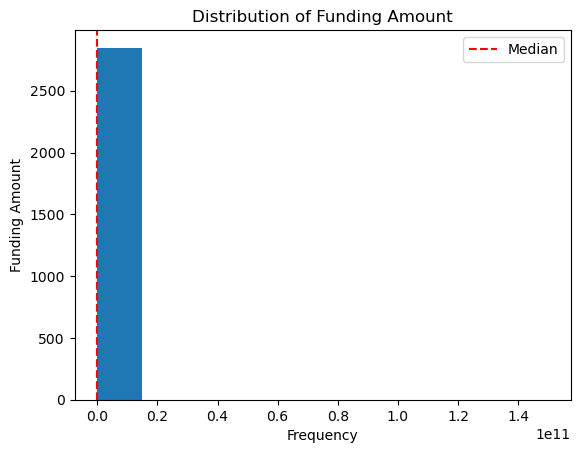

Outliers:
90      742000000.00
101    1000000000.00
104      35000000.00
115      30000000.00
116      30000000.00
            ...     
2798    100000000.00
2810     50000000.00
2817     75000000.00
2836     76000000.00
2847     55000000.00
Name: Amount($), Length: 361, dtype: float64


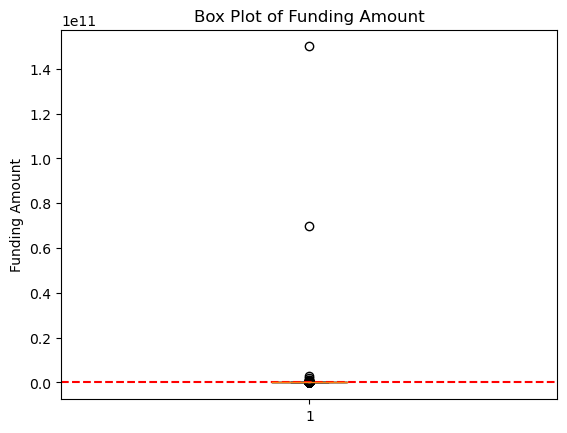

In [146]:
# Create a histogram

median_value = numerical_variable.median()
plt.hist(numerical_variable, bins=10)
plt.xlabel('Frequency')
plt.ylabel('Funding Amount')
plt.title('Distribution of Funding Amount')
# Add a vertical line for the mean
plt.axvline(median_value, color='red', linestyle='--', label='Median')

# Show the legend
plt.legend()

# Display the plot
plt.show()



# Create a box plot

plt.boxplot(numerical_variable)
plt.ylabel('Funding Amount')
plt.title('Box Plot of Funding Amount')
# Add a line for the median value
median_value = numerical_variable.median()
plt.axhline(median_value, color='red', linestyle='--', label='Median')
# Calculate Tukey's fences to identify outliers
Q1 = numerical_variable.quantile(0.25)
Q3 = numerical_variable.quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = numerical_variable[(numerical_variable < lower_fence) | (numerical_variable > upper_fence)]

# Print the outliers
print("Outliers:")
print(outliers)

# Display the plot
plt.show()






The Amount column have outliers as shown in the box - 361 occurences.

Lets explore the categorical columns and see their distribution

In [ ]:
# Describe the distribution of categorical variables
categorical_variables = ['Company/Brand', 'Stage', 'HeadQuarter']

for variable in categorical_variables:
    value_counts = final_data[variable].value_counts()
    max_count = value_counts.max()
    most_distributed_values = value_counts[value_counts == max_count]
    print(f"Variable: {variable}")
    print(most_distributed_values)
    print()

Variable: Company/Brand
Company/Brand
BharatPe    9
Name: count, dtype: int64

Variable: Stage
Stage
Unknown    970
Name: count, dtype: int64

Variable: HeadQuarter
HeadQuarter
Bengaluru    471
Name: count, dtype: int64



# 3.2.3 BIVARATE ANALYSIS

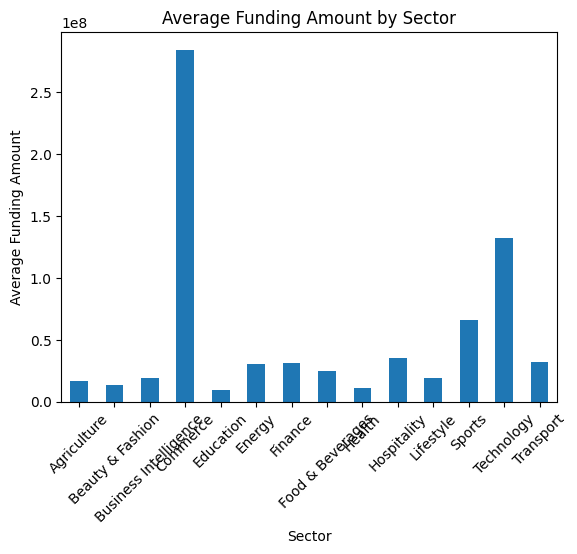

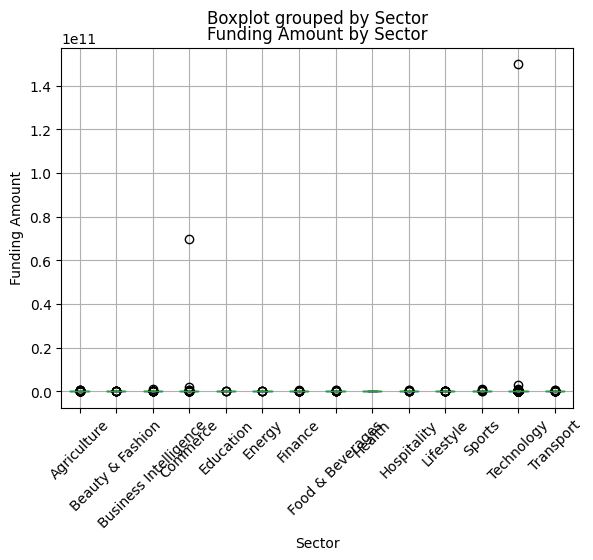

In [ ]:
# TO TEST THE RELATIONSHIP BETWEEN SECTOR AND FUNDING AMOUNT
bi_grouped = final_data.groupby('Sector')['Amount($)'].mean()

# Create a bar chart
bi_grouped.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Average Funding Amount')
plt.title('Average Funding Amount by Sector')
plt.xticks(rotation=45)
plt.show()

# Create a box plot
final_data.boxplot(column='Amount($)', by='Sector')
plt.xlabel('Sector')
plt.ylabel('Funding Amount')
plt.title('Funding Amount by Sector')
plt.xticks(rotation=45)
plt.show()


There is a relationship between the sector and funding amount given.

# 3.2.3. Multivarate Analysis

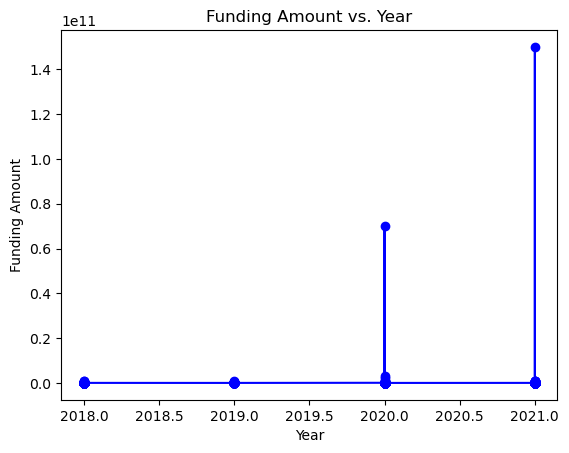

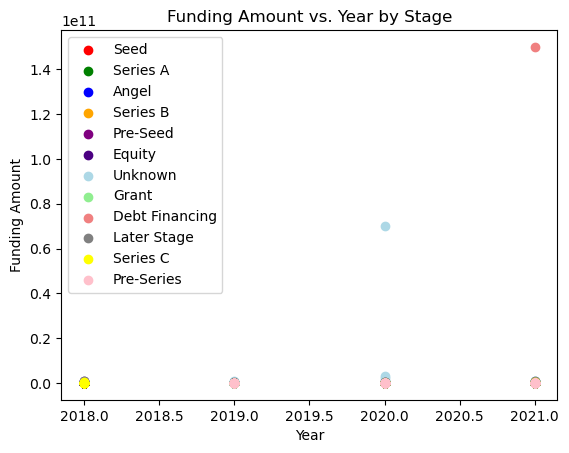

In [149]:
#Lets explore the relationship between the funding amount, year and stage

df_sorted = final_data.sort_values('Year')

# Create a line plot
plt.plot(df_sorted['Year'], df_sorted['Amount($)'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Funding Amount')
plt.title('Funding Amount vs. Year')
plt.show()

# Create a scatter plot with different colors for each stage
stages = final_data['Stage'].unique()
colors = ['red', 'green', 'blue', 'orange', 'purple','indigo','lightblue','lightgreen','lightcoral','gray', 'yellow','pink']  # Choose colors for each stage

plt.figure()
for stage, color in zip(stages, colors):
    stage_data = final_data[final_data['Stage'] == stage]
    plt.scatter(stage_data['Year'], stage_data['Amount($)'], color=color, label=stage)

plt.xlabel('Year')
plt.ylabel('Funding Amount')
plt.title('Funding Amount vs. Year by Stage')
plt.legend()
plt.show()

From the Multivariate - there is relationship between type Stage and year when it comes to funding. to show the correleation see the below.

In [ ]:
#checking correlation between year and funding amount
correlation_data = final_data[['Year','Amount($)']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the correlation matrix
print(correlation_matrix)

           Year  Amount($)
Year       1.00       0.02
Amount($)  0.02       1.00


The correlation coefficient between 'Year' and 'Amount($)' is 0.02, indicating a very weak positive correlation. This suggests that there is little to no linear relationship between the year and funding amount.

## 4. ANSWERING THE QUESTIONS


Qn.1 Which company has the highest funding?

In [ ]:

company_with_highest_funding = final_data[final_data['Amount($)'] == final_data['Amount($)'].max()]['Company/Brand'].values[0]

print("Company with the highest funding:", company_with_highest_funding)

Company with the highest funding: Alteria Capital


lets vizualize the top  company each year

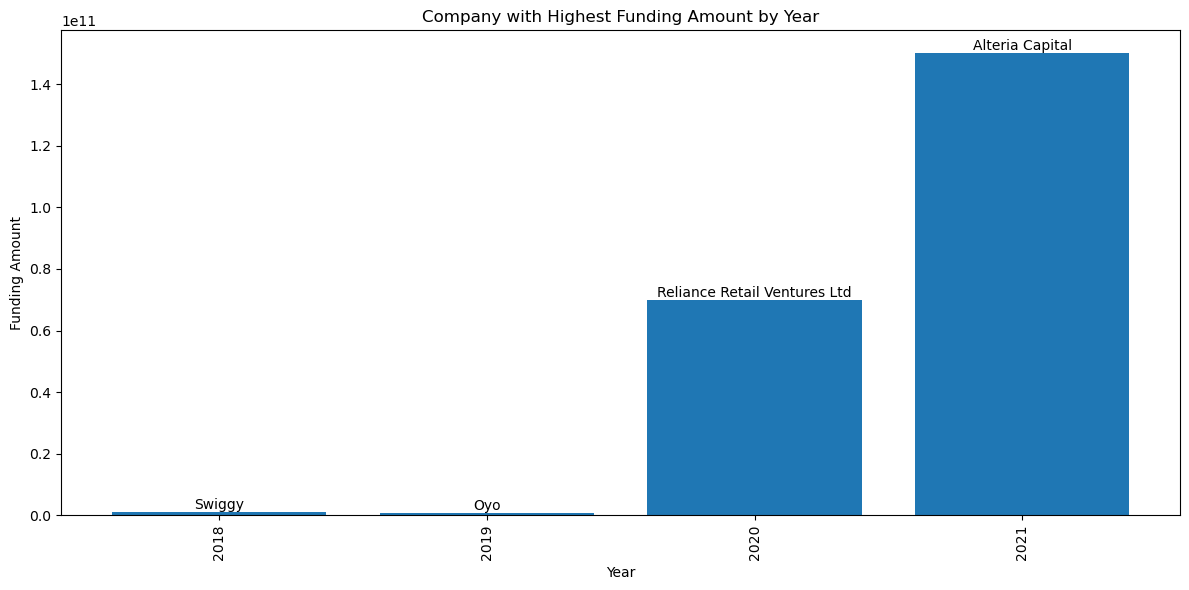

Year: 2018
Company: Swiggy
Funding Amount: $ 1000000000.0

Year: 2019
Company: Oyo
Funding Amount: $ 693000000.0

Year: 2020
Company: Reliance Retail Ventures Ltd
Funding Amount: $ 70000000000.0

Year: 2021
Company: Alteria Capital
Funding Amount: $ 150000000000.0



In [174]:
top_company_each_year = final_data.groupby('Year').apply(lambda x: x.loc[x['Amount($)'].idxmax()])

plt.figure(figsize=(12, 6))
plt.bar(top_company_each_year['Year'], top_company_each_year['Amount($)'])
plt.xlabel('Year')
plt.ylabel('Funding Amount')
plt.title('Company with Highest Funding Amount by Year')
plt.xticks(rotation=90)



# Add company names as labels on the bars
for i, row in top_company_each_year.iterrows():
    plt.text(row['Year'], row['Amount($)'], row['Company/Brand'], ha='center', va='bottom')

plt.xticks(final_data['Year'].unique())  # Show all years on the X-axis

plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Print the top company and funding amount for each year
for year, row in top_company_each_year.iterrows():
    print("Year:", year)
    print("Company:", row['Company/Brand'])
    print("Funding Amount: $", row['Amount($)'])
    print()

Qn.2 Which sector has the highest funding?

In [ ]:
sector_funding = final_data.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False)

top_sector = sector_funding.index[0]
highest_funding = sector_funding.iloc[0]

print("Sector with the highest funding:", top_sector)
print("Funding amount: $", highest_funding)

Sector with the highest funding: Technology
Funding amount: $ 175749834807.46155


lets visualize that per year.

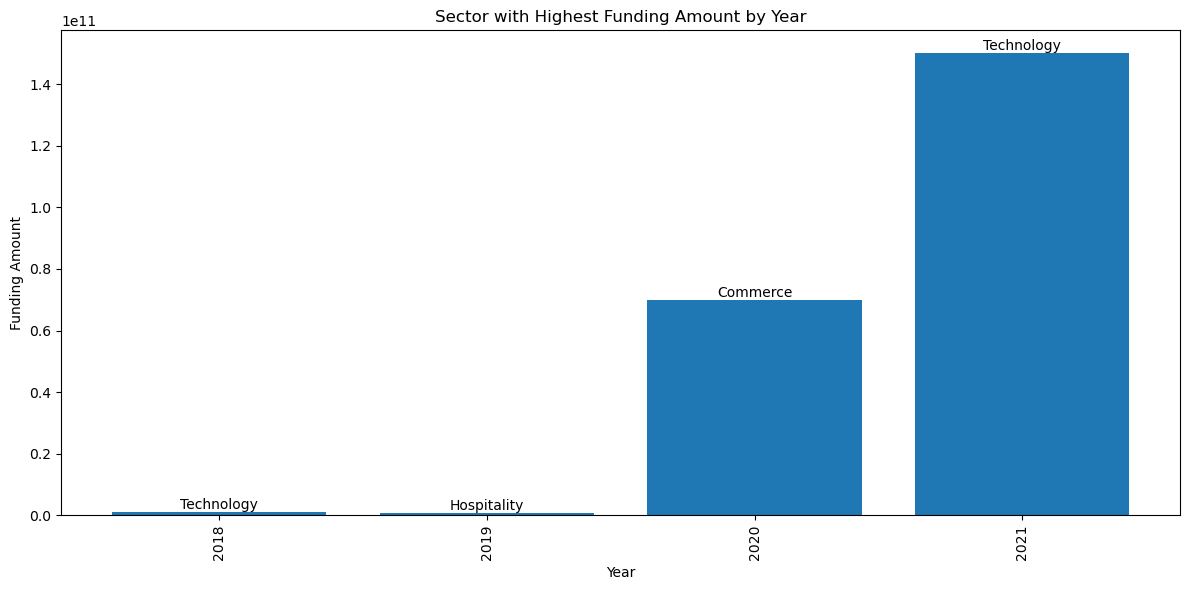

Year: 2018
Company: Technology
Funding Amount: $ 1000000000.0

Year: 2019
Company: Hospitality
Funding Amount: $ 693000000.0

Year: 2020
Company: Commerce
Funding Amount: $ 70000000000.0

Year: 2021
Company: Technology
Funding Amount: $ 150000000000.0



In [167]:
top_sector_each_year = final_data.groupby('Year').apply(lambda x: x.loc[x['Amount($)'].idxmax()])

plt.figure(figsize=(12, 6))
plt.bar(top_sector_each_year['Year'], top_sector_each_year['Amount($)'])
plt.xlabel('Year')
plt.ylabel('Funding Amount')
plt.title('Sector with Highest Funding Amount by Year')
plt.xticks(rotation=90)



# Add company names as labels on the bars
for i, row in top_company_each_year.iterrows():
    plt.text(row['Year'], row['Amount($)'], row['Sector'], ha='center', va='bottom')

# Set the X-axis ticks and labels
years = [2018, 2019, 2020, 2021]
plt.xticks(years)

plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Print the top company and funding amount for each year
for year, row in top_company_each_year.iterrows():
    print("Year:", year)
    print("Company:", row['Sector'])
    print("Funding Amount: $", row['Amount($)'])
    print()

The top sector funded over the years is Technology with Funding amount: $ 175749834807.46155

From the vizualization looking at each search top funded sectors: 2018 and 2021 - technology had the highest funding and 2019- Hospitality and for 2020 Commerce sector was most funded.  

Qn. 3 What is total amount of funding received in each year?

In [ ]:
total_funding_yearly = final_data.groupby('Year')['Amount($)'].sum()

print('The total funding each year:$', total_funding_yearly)

The total funding each year:$ Year
2018     8941029086.94
2019     3408433200.00
2020    90588818604.00
2021   180263726000.00
Name: Amount($), dtype: float64


Lets vizualize the results

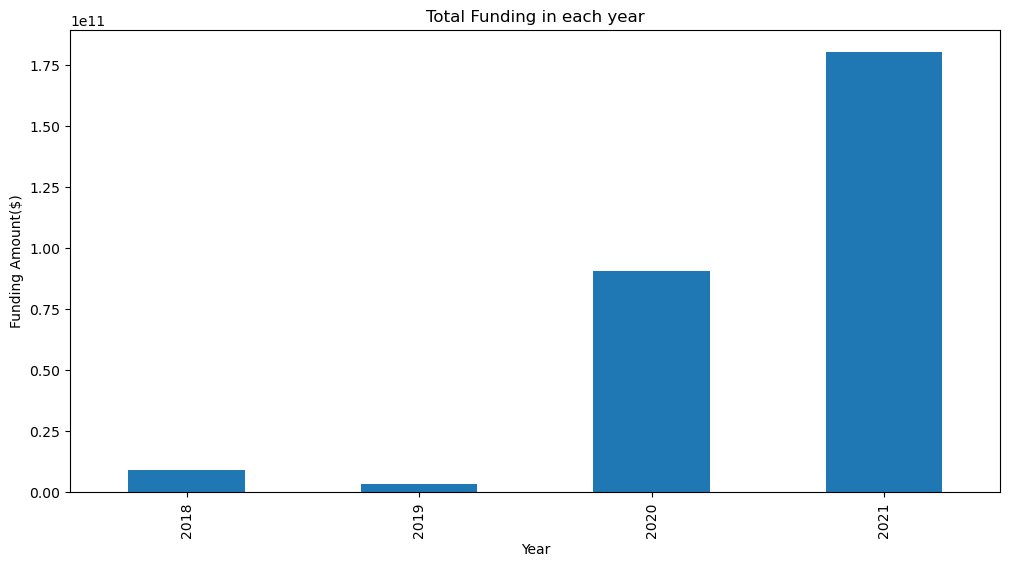

Year: 2018
Total Funding Amount: $ 8941029086.93634

Year: 2019
Total Funding Amount: $ 3408433200.0

Year: 2020
Total Funding Amount: $ 90588818604.0

Year: 2021
Total Funding Amount: $ 180263726000.0



In [181]:
total_funding_yearly = final_data.groupby('Year')['Amount($)'].sum()
plt.figure(figsize=(12, 6))
#plt.bar(total_funding_yearly('Year','Amount($)'))
total_funding_yearly.plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Funding Amount($)')
plt.title('Total Funding in each year')
plt.xticks(rotation=90)

plt.show()

# Print total funding amounts per year
for year, total_amount in total_funding_yearly.items():
    print("Year:", year)
    print("Total Funding Amount: $", total_amount)
    print()


From the chart its evident that 2021 had the highest funding of 180263726000.00 dollars, followed by 2020, 2018 and 2019 had the lowest funding of 3408433200.00 dollars. the decline from 2018 -2019 and then increase from 2020 to 2021 and change of sector funding are due to covid19 epidemic. For example in 2020 Commerce was most funded; E-commerce financing is helpful for online retailers during peak demand periods like the COVID-19 period. The financial assistance helps them pay for ongoing operating costs and expansion-related expenditures.

Qn.4 Which is location recieved most funding?

In [ ]:
location_funding = final_data.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending= False)
top_location = location_funding.index[0]
highest_funding = location_funding.iloc[0]

print('The top location is:', top_location)
print('The highest funding for that location is: $', highest_funding)

The top location is: Bengaluru
The highest funding for that location is: $ 161766175429.76657


Lets vizualize the most funded location per year

Year: 2018, Location: Bengaluru, Funding Amount: 1000000000.00
Year: 2019, Location: Gurugram, Funding Amount: 693000000.00
Year: 2020, Location: Mumbai, Funding Amount: 70000000000.00
Year: 2021, Location: Bengaluru, Funding Amount: 150000000000.00


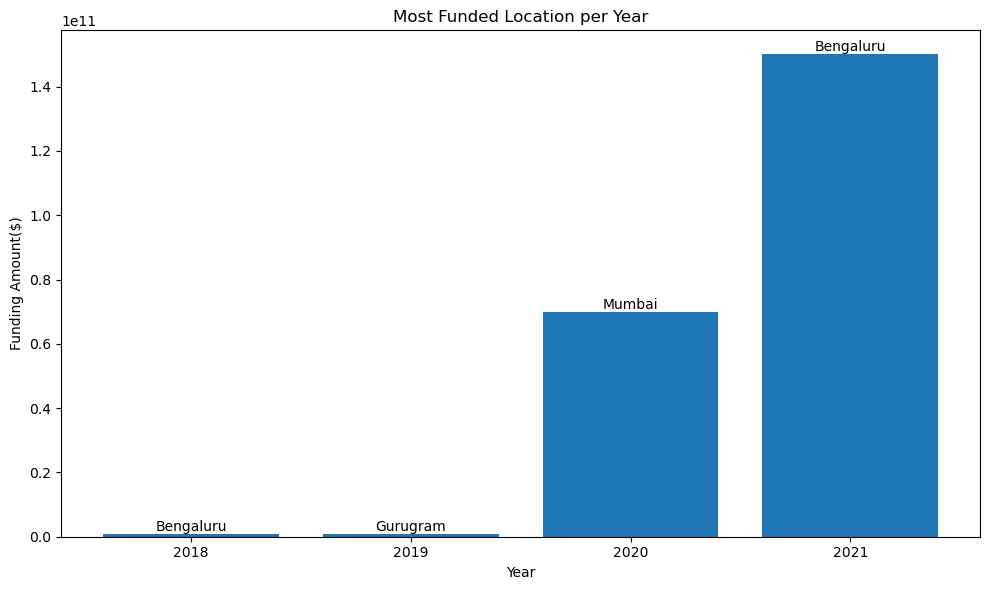

In [166]:
# Find the location with the highest funding amount for each year
most_funded_locations = final_data.loc[final_data.groupby('Year')['Amount($)'].idxmax()]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(most_funded_locations['Year'], most_funded_locations['Amount($)'])
plt.xlabel('Year')
plt.ylabel('Funding Amount($)')
plt.title('Most Funded Location per Year')
plt.xticks(final_data['Year'].unique())  # Show all years on the X-axis

# Print the amounts for the top locations in each year
for index, row in most_funded_locations.iterrows():
    print(f"Year: {row['Year']}, Location: {row['HeadQuarter']}, Funding Amount: {row['Amount($)']:.2f}")

    # Add location names as annotations to the bars
for index, row in most_funded_locations.iterrows():
    plt.text(row['Year'], row['Amount($)'], row['HeadQuarter'], ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Qn.5 At what stage do start up recieve most funding?

In [ ]:
stage_funding = final_data.groupby('Stage')['Amount($)'].sum().sort_values(ascending = False)
top_stage = stage_funding.index[0]
highest_funding_stage = location_funding.iloc[0]
print('The top funded stage is:', top_stage)
print('With funding amount of: $', highest_funding_stage)

The top funded stage is: Debt Financing
With funding amount of: $ 161766175429.76657


Lets vizualize most funded stage for each year and use pie chart

Year: 2018, Stage: Later Stage, Funding Amount: $1000000000.0
Year: 2019, Stage: Unknown, Funding Amount: $693000000.0
Year: 2020, Stage: Unknown, Funding Amount: $70000000000.0
Year: 2021, Stage: Debt Financing, Funding Amount: $150000000000.0


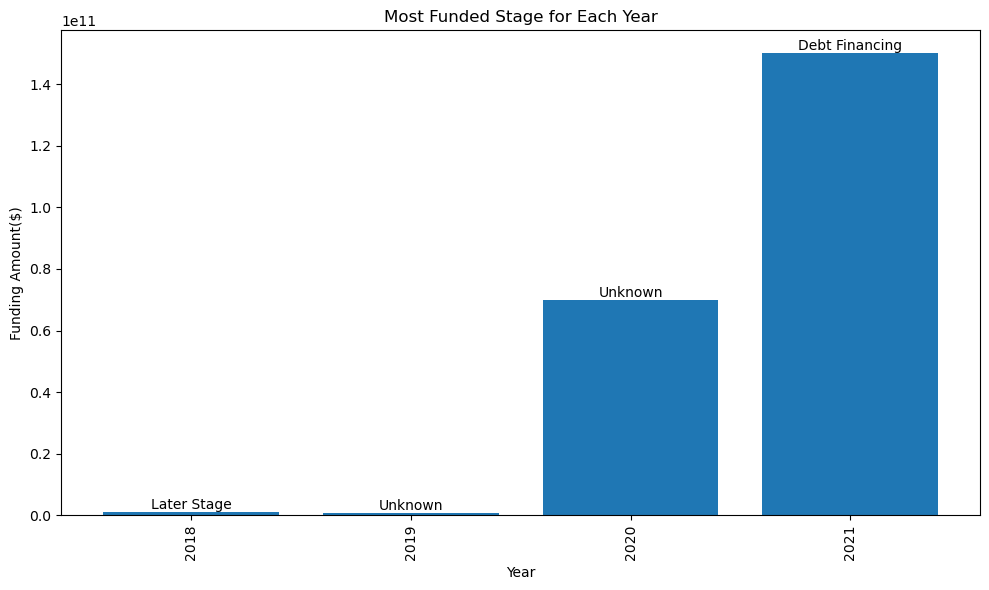

In [202]:
# Find the most funded stage for each year
most_funded_stage_per_year = final_data.groupby('Year')['Amount($)', 'Stage'].apply(lambda x: x.nlargest(1, 'Amount($)'))

# Reset the index to include 'Year' as a regular column
most_funded_stage_per_year.reset_index(inplace=True)

# Create a bar chart to show the most funded stage for each year
plt.figure(figsize=(10, 6))
plt.bar(most_funded_stage_per_year['Year'], most_funded_stage_per_year['Amount($)'])
plt.xlabel('Year')
plt.ylabel('Funding Amount($)')
plt.title('Most Funded Stage for Each Year')
plt.xticks(final_data['Year'].unique())  # Show all years on the X-axis
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent overlapping labels


# Add the stage of funding as text on the bars
for year, year_group in most_funded_stage_per_year.groupby('Year'):
    for index, row in year_group.iterrows():
        plt.text(row['Year'], row['Amount($)'], row['Stage'], ha='center', va='bottom')

        # Print the stage, year, and funding amount
        print(f"Year: {row['Year']}, Stage: {row['Stage']}, Funding Amount: ${row['Amount($)']}")

plt.show()

## CONCLUSION  FROM THE ANALYSIS

1. Alteria Capital Company recieved most funding of in general  $ 150000000000.  Across the years in 2018 Year Swiggy Company recieved most Funding Amount of  $ 1000000000.0
In Year: 2019 Oyo company recieved the most funding of $ 693000000.0
In year: 2020 Reliance Retail Ventures Ltd company recieved most funding of $ 70000000000.0
In year 2021 Alteria Capital company recieved most funding of $ 150000000000.0

2. The top location funded across the years is Bengaluru with a funding of $ 161766175429.76657. Across the years; Year: 2018, Location: Bengaluru, Funding Amount: 1000000000.00
Year: 2019, Location: Gurugram, Funding Amount: 693000000.00
Year: 2020, Location: Mumbai, Funding Amount: 70000000000.00
Year: 2021, Location: Bengaluru, Funding Amount: 150000000000.00.

3. 